#from: https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [ ]:
!pip install prophet
# about 90 seconds

In [ ]:
import pandas as pd
import altair as alt
from prophet import Prophet

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving permNWPR.csv to permNWPR.csv


In [ ]:
df = pd.read_csv('permNWPR.csv')

In [ ]:
df.head()

,ds,y
0,1/1/2007,53
1,2/1/2007,55
2,3/1/2007,52
3,4/1/2007,68
4,5/1/2007,61


In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=6)
future.tail()

,ds
187,2022-06-03
188,2022-06-04
189,2022-06-05
190,2022-06-06
191,2022-06-07


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
187,2022-06-03,1567.590205,1319.308312,1820.083190
188,2022-06-04,1570.920366,1312.624321,1801.602738
189,2022-06-05,1571.010756,1321.014788,1818.795450
190,2022-06-06,1567.923045,1335.296627,1833.807911
191,2022-06-07,1561.795756,1326.682342,1787.499598


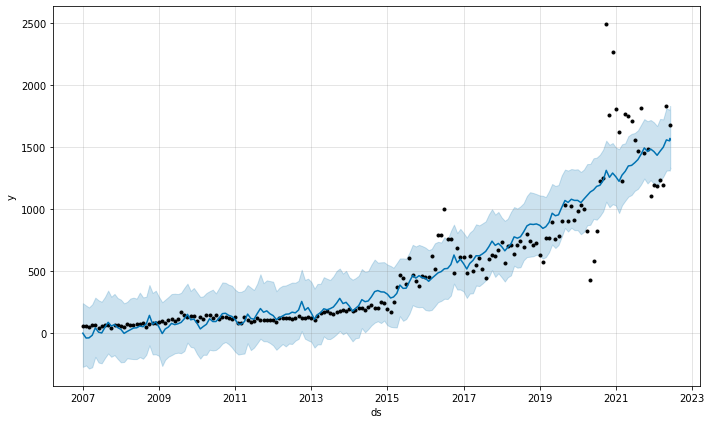

In [ ]:
fig1 = m.plot(forecast)


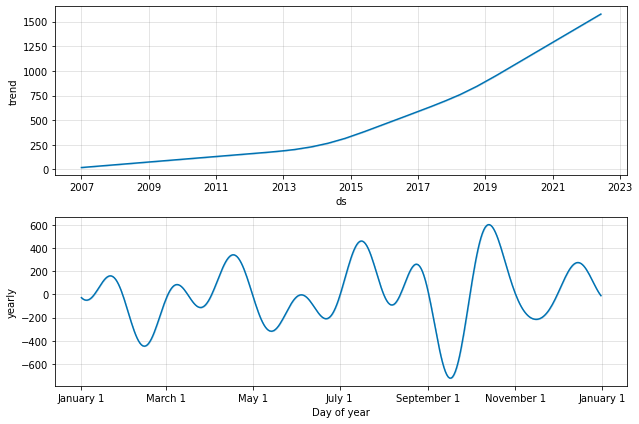

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)


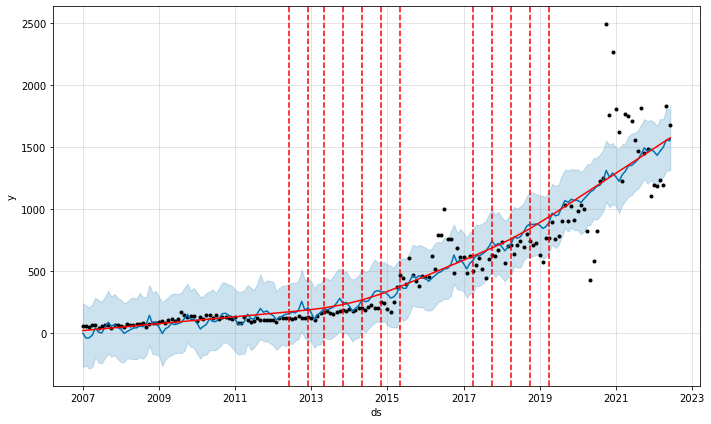

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


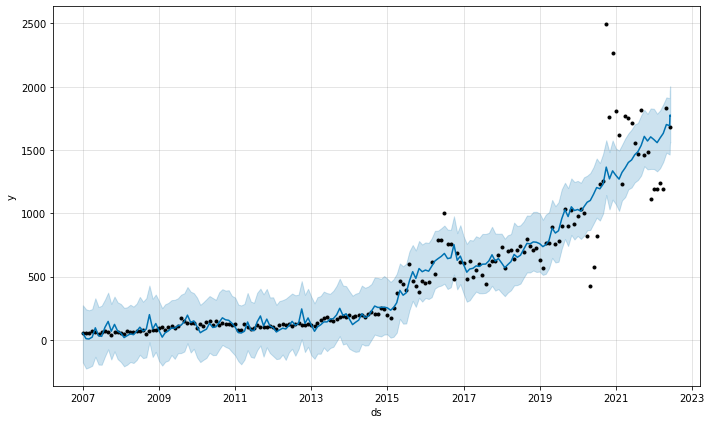

In [ ]:
m = Prophet(changepoint_prior_scale=3.9)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


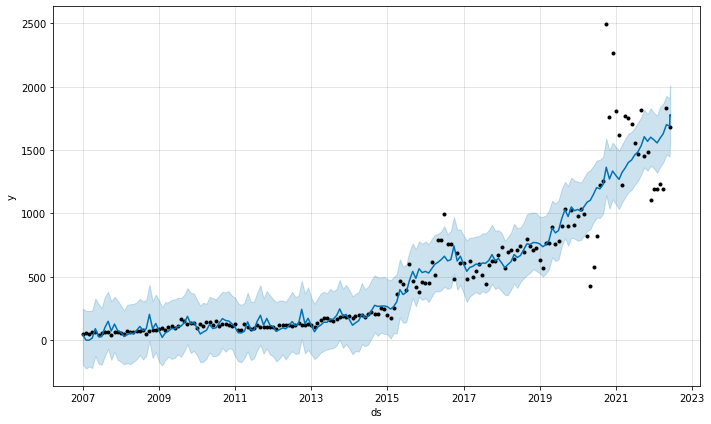

In [ ]:
m = Prophet(changepoint_prior_scale=2)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


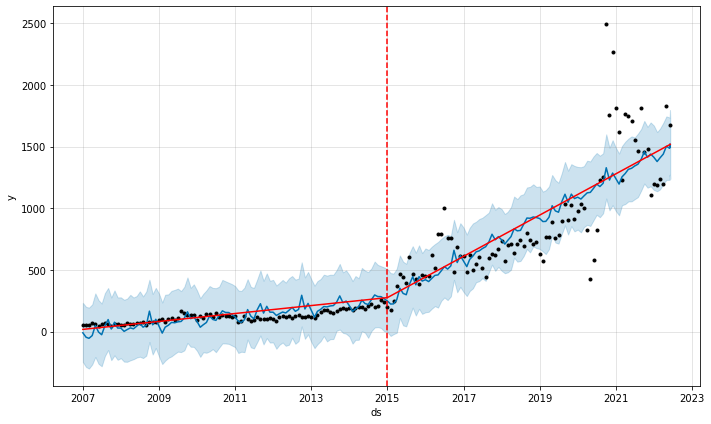

In [ ]:
m = Prophet(changepoints=['2015-01-01', '2016-01-01', '2016-08-01', '2020-06-01'],n_changepoints=4)
#m = Prophet(changepoints=['2009-03-09', '2010-07-02', '2011-09-26', '2012-03-20', '2010-04-06'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
#m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


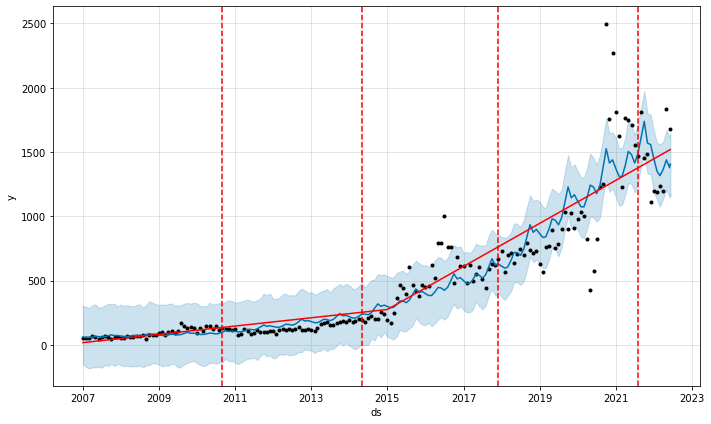

In [ ]:
#m = Prophet(changepoints=['2015-01-01', '2016-10-01', '2019-07-01', '2020-10-01'], seasonality_mode='multiplicative',changepoint_prior_scale=0.39, changepoint_range=0.08, seasonality_prior_scale=0.5).fit(df)
m = Prophet(n_changepoints=4, seasonality_mode='multiplicative',changepoint_prior_scale=80, changepoint_range=0.95, seasonality_prior_scale=0.05).fit(df)
future = m.make_future_dataframe(periods=8)
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
plot_components_plotly(m, forecast)